In [1]:
import sys,os,warnings
warnings.filterwarnings("ignore", category=UserWarning, module='tensorflow_addons')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
sys.path.insert(0, '/home/jupyter/EpiBERT')
import tensorflow as tf

import tensorflow.experimental.numpy as tnp
from tensorflow import strings as tfs
from tensorflow.keras import mixed_precision

import src.models.epibert_atac_pretrain as epibert
import training_utils_atac_pretrain as training_utils
from scipy import stats
import kipoiseq
import analysis.interval_and_plotting_utilities as utils
mixed_precision.set_global_policy('mixed_bfloat16')

In [2]:
model1 = epibert.epibert()
model2 = epibert.epibert()
checkpoint1_path="/home/jupyter/models/model1/ckpt-45"
checkpoint2_path="/home/jupyter/models/model2/ckpt-45"
genformer = utils.genformer_model_nostrat(model1,model2,checkpoint1_path, checkpoint2_path)

loaded checkpoints


In [3]:
fasta_file = 'hg38_erccpatch.fa'
fasta_extractor = utils.FastaStringExtractor(fasta_file)
interval = "chr12:9764945-9764951"
variant = ('chr12:9764948', 'T') # score an example C -> T transition at position chr12:9764948 in a CD69 enhancer
atac_file="/home/jupyter/data/HG_Jurkat_stim.bed.gz"
motif_activity='/home/jupyter/data/HG_Jurkat_stim.tsv'
gtf_file = '/home/jupyter/data/hg38.refGene.gtf'

In [4]:
inputs, inputs_mut, masked_atac, motif,target_atac, masked_atac_reshape, mask, mask_centered,interval_resize = \
    utils.return_inputs_caqtl_score(interval, variant, atac_file, motif_activity, fasta_extractor)

In [5]:
with tf.device('/GPU:0'):
    output,output_mut,caqtl_score = genformer.ca_qtl_score(inputs,inputs_mut)


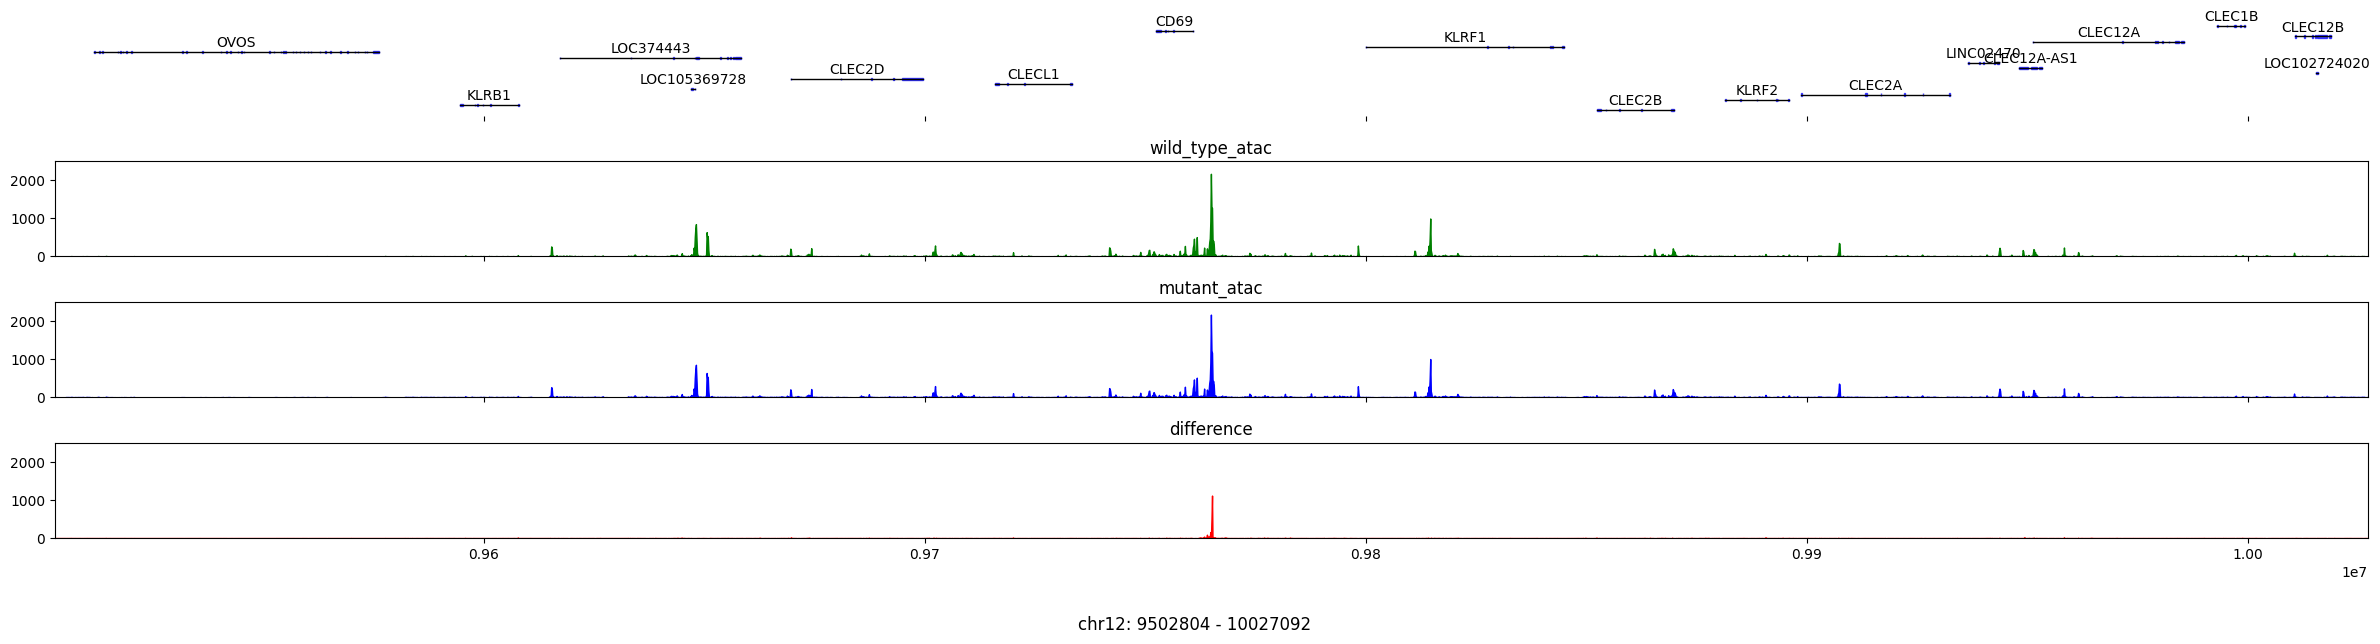

In [6]:
tracks={'wild_type_atac': (output, 'green'),
        'mutant_atac': (output_mut, 'blue'),
        'difference': ((output - output_mut)*10, 'red')}
        
utils.plot_tracks_with_genes(tracks,gtf_file,interval_resize,2500)

In [7]:
print(caqtl_score)

-72.0
